# Problem Set 3 Solutions

# Draine 27.1 (a)

Consider an H II region consisting only of hydrogen. 

Suppose that the source of ionizing photons is a blackbody with temperature $T_{\mathrm{eff}}$ = 32000 K. 

Assume the nebula is in thermal ( $\Gamma = \Lambda$ ) and ionization ( $n_X\zeta_{pi} = \displaystyle n_{X^+} n_e \alpha_B$ ) equilibrium.


**(a)** Near the center of the nebula, at what temperature will heating by photoionization balance cooling?

In [1]:
import numpy as np                          # I use this for maths and sometimes arrays.
                                            # "np" is just an abbreviation since we call this package so often!
import pylab                                # I use this for arrays and plotting sometimes
import matplotlib
import matplotlib.pyplot as plt                    # Standard plotting package
import scipy

from astropy import units as u              # This one helps with unit conversion
from astropy.io import fits


                                            # Super important!! 
                                            # This embeds plots in the Jupyter window 
                                            # (instead of showing them as pop-ups)
%matplotlib inline                             

plt.rc('font', family='sans-serif')  # Set plot fonts
plt.rc('text', usetex=True)      
#plt.rc('text', usetex=False)        # This is a quick fix if you don't have latex on your computer


## Solution

We know from the **October 13** lecture notes that, to order-of-magnitude, if we can only consider recombination cooling, then $T_e \sim T_{\mathrm{eff}}$. This gives us a rough expectation for our answer, but we will proceed to work this out in more detail, using the more exact approximations from Draine. 

In particular:

* We will need to consider both free-free continuum cooling and recombination cooling
* We will use the expressions from Draine for the typical kinetic and free-free radiation energies removed from the gas by each recombination 
* We will ignore cosmic ray ionization heating, as it requires a number of assumptions for which we do not have data in this problem. 


**(1)** Assuming that the nebula is in ionization equilibrium, 

$n_H\zeta_{pi} = \displaystyle n_{H^+} n_e \alpha_B$. 

We can then express the heating rate as:

$n_H \zeta_{pi} \langle E_{pi}\rangle  = \displaystyle n_{H^+} n_e \alpha_B \langle E_{pi}\rangle $

And the cooling rate as:

$\displaystyle \Lambda_{rr} =  n_{H^+} n_e \alpha_B \left(\langle E_{rr}\rangle + \langle E_{ff}\rangle \right)$


**(2)** Now considering the typical energies per ionization/recombination:

* For heating due to photoionization (**Draine Equation 27.7** ):

$\langle E_{pi}\rangle = \langle\psi \rangle k_B T_{\mathrm{eff}} $ and for $T_{\mathrm{eff}} = 32,000$ K we will take $\langle\psi \rangle$ = 1.38 from **Table 27.1** :

$\langle E_{pi}\rangle = 1.38\; k_B T_{\mathrm{eff}} $

* For cooling due to case B recombination of hydrogen (**Draine Equation 27.23** ) :

$\langle E_{rr}\rangle = \displaystyle \left[0.684 - 0.0416\; \ln \left( \frac{1}{Z^2} \frac{T_e}{10^4\; \mathrm{K}}\right) \right] k_B T_e\qquad$  where $Z=1$


* And for free-free cooling (**Draine Equation 27.24**) 

$\langle E_{ff}\rangle = \displaystyle 0.54 \left( \frac{T_e}{10^4\; \mathrm{K}} \right)^{0.37} k_B T_e$

**(3)** Putting this all together, we have:

$\displaystyle n_{H^+} n_e \alpha_B \langle E_{pi}\rangle = n_{H^+} n_e \alpha_B \left(\langle E_{rr}\rangle + \langle E_{ff}\rangle \right)$

$1.38\; (32,000\; \mathrm{K}) = \displaystyle \left[0.684 + 0.54 \left( \frac{T_e}{10^4\; \mathrm{K}}\right)^{0.37} -\, 0.0416\; \ln \left( \frac{T_e}{10^4\; \mathrm{K}}\right) \right] T_e $

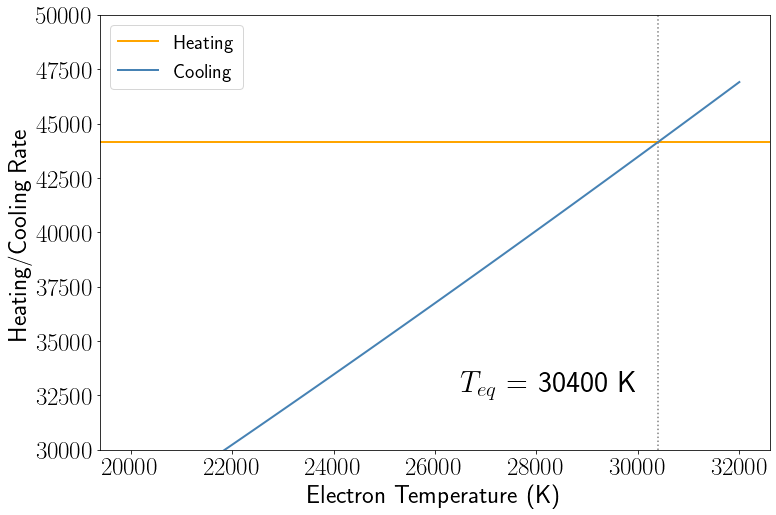

In [34]:
T_es = np.linspace(20000, 32000, 50)

plt.figure(1,figsize=(12,8))
plt.axhline(1.38*32000,label="Heating",color='orange',lw=2)
plt.plot(T_es, T_es*(0.684+0.54*(T_es/10000)**0.37 - 0.0416*np.log(T_es/10000)),label="Cooling",color='steelblue',lw=2)
plt.axvline(30400,color='grey',ls=':')
plt.text(26500,32500,'$T_{eq}$ = 30400 K',fontsize=30)
plt.xlabel("Electron Temperature (K)",fontsize=25)
plt.ylabel("Heating/Cooling Rate",fontsize=25)
plt.ylim(30000,50000)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.legend(fontsize=20)

